# skleanを用いたPCAの練習

やること
* 相関行列
* PCA
* 寄与率

やらないこと
* 分類モデルを作る

In [171]:
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

## データセット読み込み

In [59]:
df_X, sr_Y = datasets.load_wine(return_X_y = True, as_frame = True)

In [60]:
print(type(df_X))
print(type(sr_Y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


素朴にデータを眺めてみる．

In [203]:
df_X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767


In [211]:
df_X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,3.991813e-17,-3.991813e-17,1.372186e-17,3.991813e-17,-1.995907e-17,0.000000,-3.991813e-17,-3.991813e-17,0.000000,2.993860e-17,-3.991813e-17,3.991813e-17,-3.991813e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.427388e+00,-1.428952e+00,-3.668813e+00,-2.663505e+00,-2.082381e+00,-2.101318,-1.691200e+00,-1.862979e+00,-2.063214,-1.629691e+00,-2.088840e+00,-1.889723e+00,-1.488987e+00
25%,-7.860275e-01,-6.568956e-01,-5.705131e-01,-6.871987e-01,-8.220960e-01,-0.882977,-8.252115e-01,-7.380592e-01,-0.595603,-7.928659e-01,-7.654033e-01,-9.495697e-01,-7.824306e-01
50%,6.082829e-02,-4.219218e-01,-2.375431e-02,1.514024e-03,-1.219377e-01,0.095690,1.058511e-01,-1.755994e-01,-0.062721,-1.587767e-01,3.303369e-02,2.370660e-01,-2.330629e-01
75%,8.337767e-01,6.679088e-01,6.961448e-01,6.003946e-01,5.082048e-01,0.806722,8.466967e-01,6.078267e-01,0.627406,4.925666e-01,7.111583e-01,7.863692e-01,7.561165e-01
max,2.253415e+00,3.100446e+00,3.147447e+00,3.145637e+00,4.359076e+00,2.532372,3.054216e+00,2.395645e+00,3.475269,3.425768e+00,3.292407e+00,1.955399e+00,2.963114e+00


In [212]:
sr_Y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [69]:
N, D = df_X.shape
print(N, D)

178 13


13次元データが178個ある．

In [68]:
# scaling
df_X = (df_X - df_X.mean(axis = 0)) / df_X.std(axis = 0)
df_X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,3.991813e-17,-3.991813e-17,1.372186e-17,3.991813e-17,-1.995907e-17,0.000000,-3.991813e-17,-3.991813e-17,0.000000,2.993860e-17,-3.991813e-17,3.991813e-17,-3.991813e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.427388e+00,-1.428952e+00,-3.668813e+00,-2.663505e+00,-2.082381e+00,-2.101318,-1.691200e+00,-1.862979e+00,-2.063214,-1.629691e+00,-2.088840e+00,-1.889723e+00,-1.488987e+00
25%,-7.860275e-01,-6.568956e-01,-5.705131e-01,-6.871987e-01,-8.220960e-01,-0.882977,-8.252115e-01,-7.380592e-01,-0.595603,-7.928659e-01,-7.654033e-01,-9.495697e-01,-7.824306e-01
50%,6.082829e-02,-4.219218e-01,-2.375431e-02,1.514024e-03,-1.219377e-01,0.095690,1.058511e-01,-1.755994e-01,-0.062721,-1.587767e-01,3.303369e-02,2.370660e-01,-2.330629e-01
75%,8.337767e-01,6.679088e-01,6.961448e-01,6.003946e-01,5.082048e-01,0.806722,8.466967e-01,6.078267e-01,0.627406,4.925666e-01,7.111583e-01,7.863692e-01,7.561165e-01
max,2.253415e+00,3.100446e+00,3.147447e+00,3.145637e+00,4.359076e+00,2.532372,3.054216e+00,2.395645e+00,3.475269,3.425768e+00,3.292407e+00,1.955399e+00,2.963114e+00


## 可視化

### 相関行列

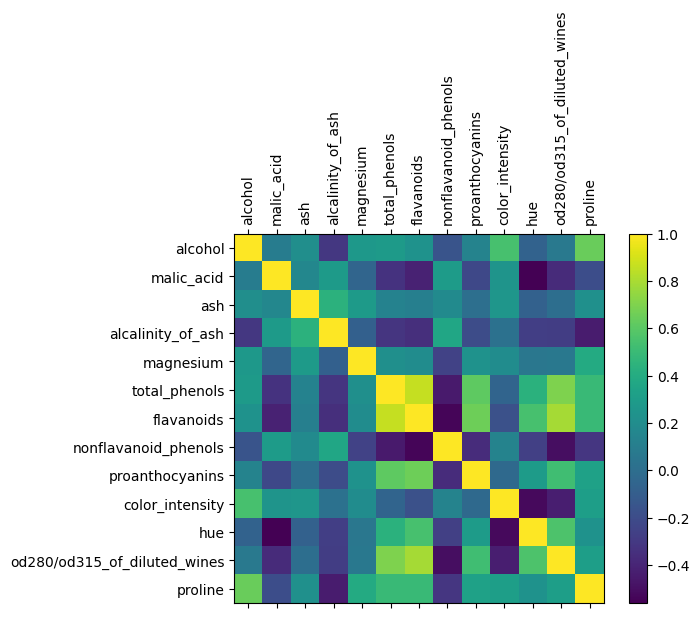

In [76]:
corr_mat = df_X.corr()

fig, ax = plt.subplots()
img = ax.matshow(corr_mat)
fig.colorbar(img)

ax.set_yticks(np.arange(D), labels = df_X.columns)
ax.set_xticks(np.arange(D), labels = df_X.columns, rotation = 90)

説明変数のうち
* total_phenols
* flavanoids

同士の相関が高いので片方を落とすことも考えられる．
実際，flavanoidsを落としてデータセットの分散を計算するとそれほど落ちない

In [198]:
df_X_dropped = df_X.drop(columns = "flavanoids", axis = 1)

energy_origin = (df_X ** 2).sum(axis = 1).sum(axis = 0)
energy_dropped = (df_X_dropped ** 2).sum(axis = 1).sum(axis = 0)

print(f"energy_origin = {energy_origin}, energy_dropped = {energy_dropped}")
print(f"energy_ratio = {100 * energy_dropped / energy_origin}%")

energy_origin = 2301.0000000000005, energy_dropped = 2124.0000000000005
energy_ratio = 92.30769230769232%


### PCA



In [156]:
pca = PCA(n_components = D)

In [157]:
pca.fit(df_X, sr_Y)

PCA(n_components=13)

In [158]:
components = pca.components_
print(type(components))
print(components.shape)

<class 'numpy.ndarray'>
(13, 13)


#### 可視化

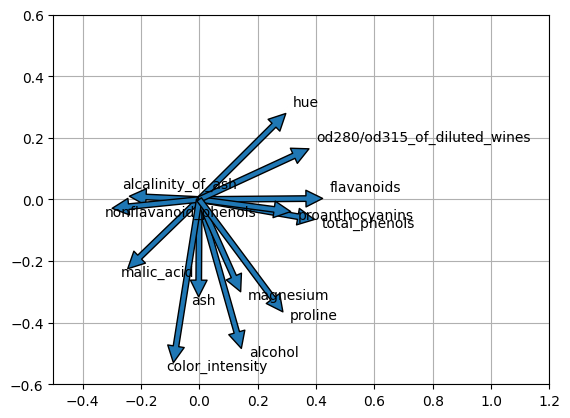

In [159]:
fig, ax = plt.subplots()
ax.grid()

for d in range(D):
  phi = components[0:2, d]
  ax.annotate(text = "", xy = phi, xytext = (0,0), arrowprops = dict())
for d in range(D):
  phi = components[0:2, d]
  feature_name = df_X.columns[d]
  ax.text(
      phi[0] + 0.05 * ( (phi[0] > 0) - 0.5),
      phi[1]+ 0.05 * ( (phi[1] > 0) - 0.5),
  feature_name)

ax.set_xlim(-0.5, 1.2)
ax.set_ylim(-0.6, 0.6)

fig.show()


### 寄与率

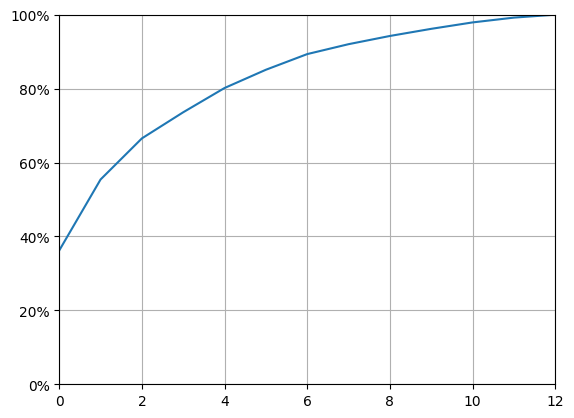

In [172]:
explained_variance_ratio = pca.explained_variance_ratio_

fig, ax = plt.subplots()

ax.plot(np.arange(D), np.cumsum(explained_variance_ratio))

ax.set_xlim(0,D-1)
ax.set_ylim(0,1)

ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0))

ax.grid()

fig.show()